In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("ML470_S2_Diabetes_Data_Concept.xlsx")

C:\Users\Haani\AppData\Local\Temp\ipykernel_24104\4093100433.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


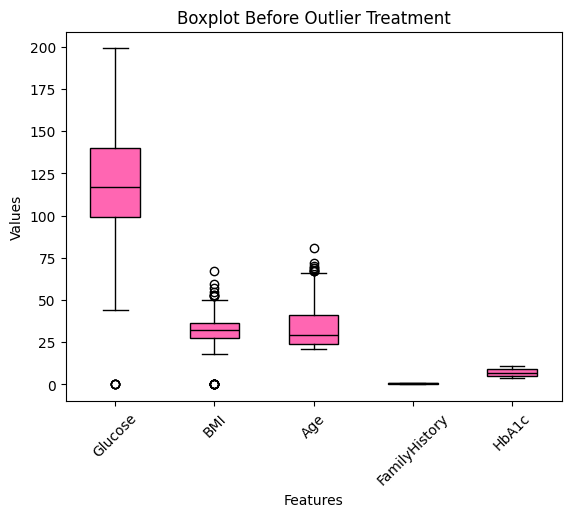

C:\Users\Haani\AppData\Local\Temp\ipykernel_24104\4093100433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


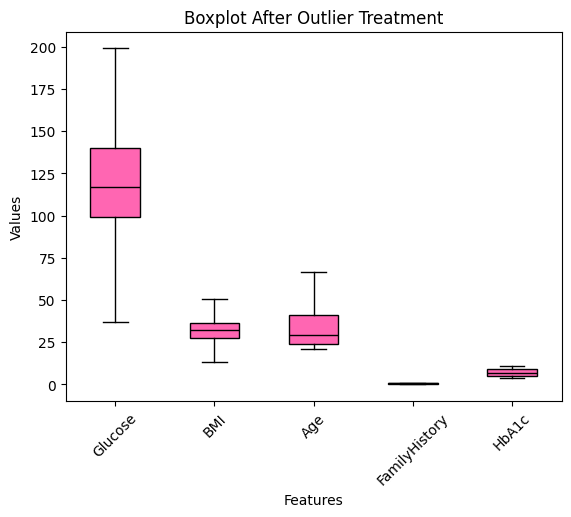

In [5]:
features = ["Glucose", "BMI", "Age", "FamilyHistory", "HbA1c"]
data = df[features]

plt.figure()
plt.boxplot(
    data.values,
    labels=data.columns,
    patch_artist=True,
    boxprops=dict(facecolor='#FF66B2', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
plt.title("Boxplot Before Outlier Treatment")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

treated_data = data.copy()

for col in treated_data.columns:
    Q1 = treated_data[col].quantile(0.25)
    Q3 = treated_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    treated_data[col] = np.where(
        treated_data[col] < lower, lower,
        np.where(treated_data[col] > upper, upper, treated_data[col])
    )

plt.figure()
plt.boxplot(
    treated_data.values,
    labels=treated_data.columns,
    patch_artist=True,
    boxprops=dict(facecolor='#FF66B2', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
plt.title("Boxplot After Outlier Treatment")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()